# description

Red wine quality classification.
Target quality classes from 1 to 10.

# import

In [1]:
#import all needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend import plotting

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV


from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

# data preparation

In [2]:
#read data
wine = pd.read_csv('winequality-red.csv')

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
# check for correlation
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


## target

In [10]:
# set target
y = wine['quality']

In [11]:
# counting the number of samples in each class
class_values, class_counts = np.unique(y, return_counts=True)
print('quality : number of samples')
for one_class, one_counts in zip(class_values, class_counts):
    print(f'{one_class}: {one_counts}')

quality : number of samples
3: 10
4: 53
5: 681
6: 638
7: 199
8: 18


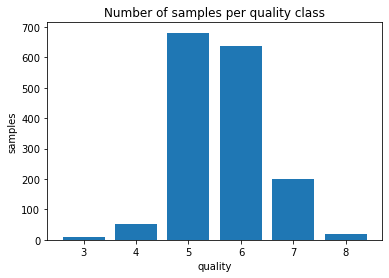

In [12]:
fig = plt.Figure(figsize=(15,15))
plt.bar(class_values, class_counts)
plt.xlabel('quality')
plt.ylabel('samples')
plt.title('Number of samples per quality class')
plt.show()

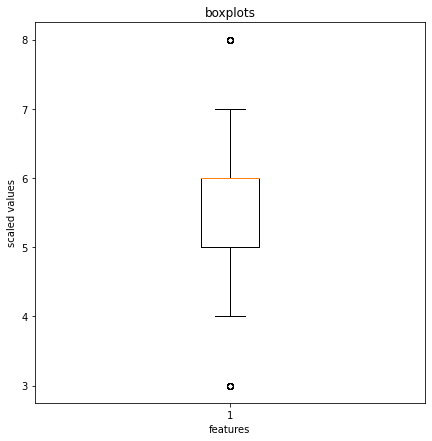

In [13]:
#boxplot with scaled features
fig = plt.figure(figsize=(7,7))
plt.boxplot(wine['quality'])
plt.xlabel("features")
plt.ylabel("scaled values")
plt.title("boxplots")
plt.show()

## feature variables

In [14]:
X = wine[wine.columns.drop('quality')]

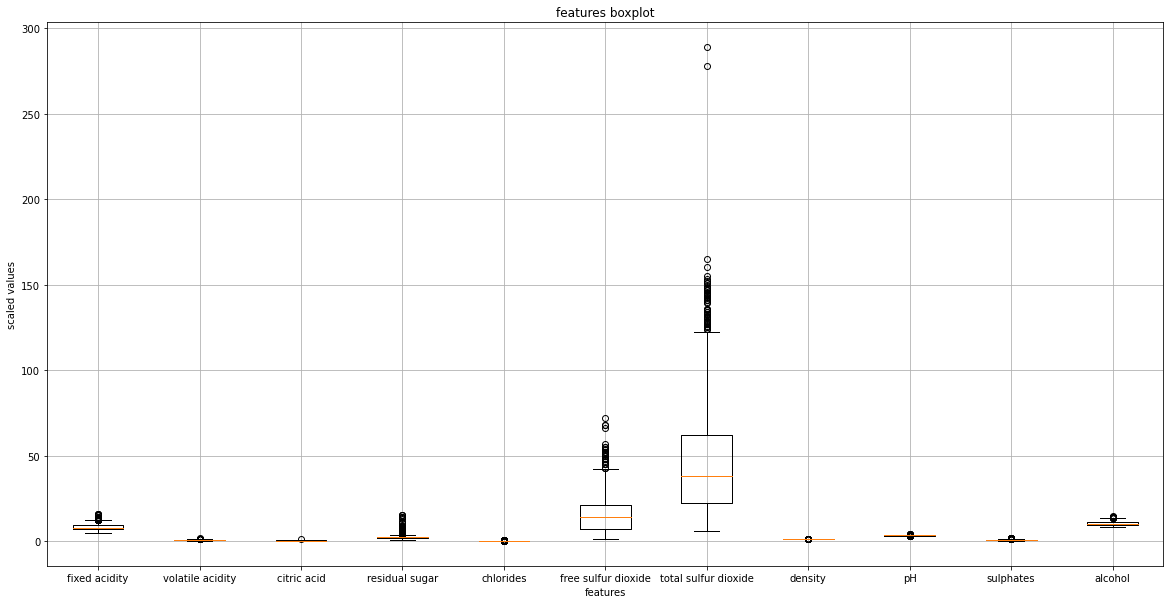

In [15]:
#boxplot of features
fig = plt.figure(figsize=(20,10))
plt.boxplot(X, labels=list(X.columns))
plt.xlabel("features")
plt.ylabel("scaled values")
plt.title("features boxplot")
plt.grid()
plt.show()


### feature scaling

In [16]:
X_norm = MinMaxScaler().fit_transform(X)

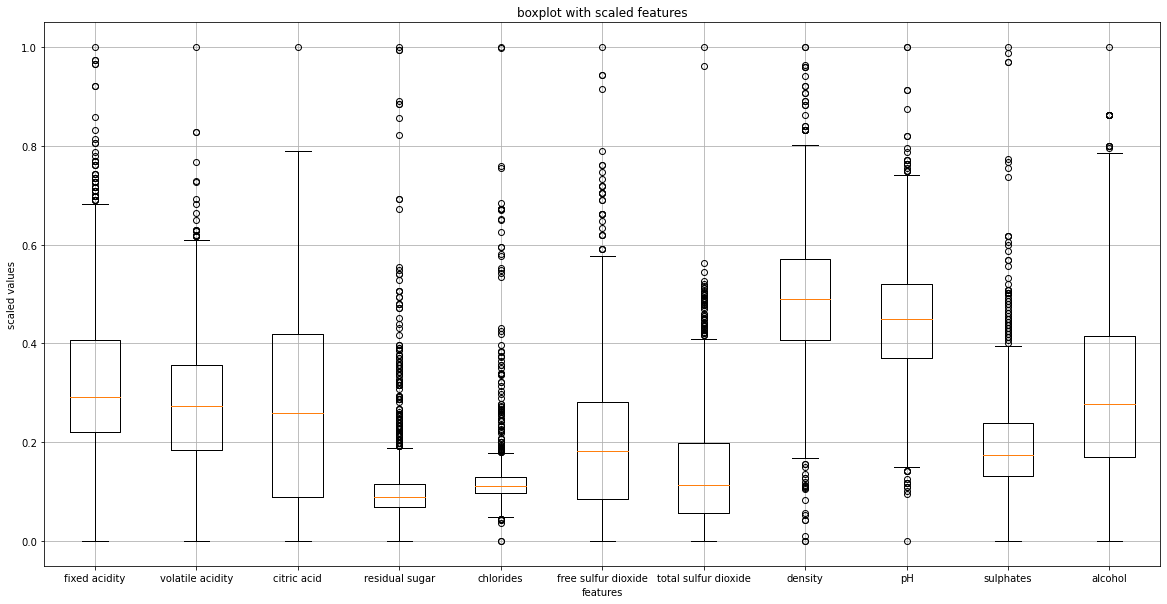

In [17]:
#boxplot of scaled features
fig = plt.figure(figsize=(20,10))
plt.boxplot(X_norm, labels=list(X.columns))
plt.xlabel("features")
plt.ylabel("scaled values")
plt.title("boxplot with scaled features")
plt.grid()
plt.show()

In [18]:
# lots of outliers

# training-validation dataset splitting

In [20]:
#split dataset into training and validation
x_train, x_val, y_train, y_val = train_test_split(
    X_norm,
    y,
    test_size=0.2,
    random_state=123
)

In [21]:
# counting the number of samples in each class TRAINING
class_values_tr, class_counts_tr = np.unique(y_train, return_counts=True)
print('Number of samples per quality class - training set')
for one_class, one_counts in zip(class_values_tr, class_counts_tr):
    print(f'{one_class}: {one_counts}')

Number of samples per quality class - training set
3: 9
4: 40
5: 550
6: 507
7: 160
8: 13


In [22]:
# counting the number of samples in each class VALIDATION
class_values_val, class_counts_val = np.unique(y_val, return_counts=True)
print('Number of samples per quality class - validation set')
for one_class, one_counts in zip(class_values_val, class_counts_val):
    print(f'{one_class}: {one_counts}')

Number of samples per quality class - validation set
3: 1
4: 13
5: 131
6: 131
7: 39
8: 5


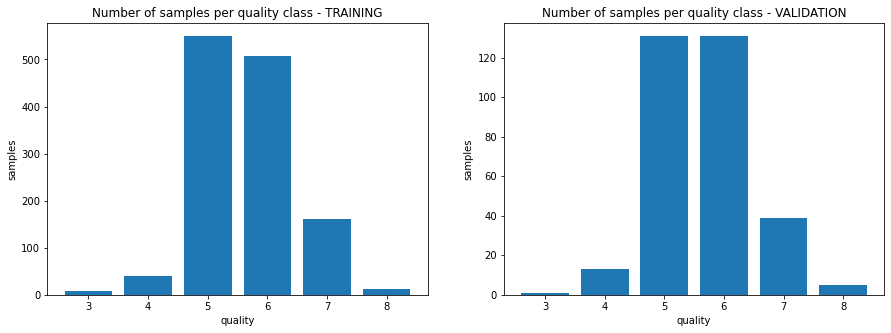

In [23]:
#training and validation sets on a plots
fig, ax = plt.subplots(
    nrows=1,
    ncols=2, 
    figsize=(15,5)
)

ax[0].bar(class_values_tr, class_counts_tr)
ax[0].set_xlabel('quality')
ax[0].set_ylabel('samples')
ax[0].set_title('Number of samples per quality class - TRAINING')

ax[1].bar(class_values_val, class_counts_val)
ax[1].set_xlabel('quality')
ax[1].set_ylabel('samples')
ax[1].set_title('Number of samples per quality class - VALIDATION')

plt.show()

# MODELS

In [24]:
# classification models
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    SVC(),
    KNeighborsClassifier()
]

In [33]:
#list of hyperparameters dictonaries
params = [
    #linear regression
    {
        'C': [0.01, 1, 10, 100],
        'max_iter' : [1000],
    },
    #decision tree
    {
        'max_depth': [4,5,6,7],
        'min_samples_split': [4,5,6,7,8],
        'min_samples_leaf': [1,2,3,4],
    },
    #random forest
    {
        'max_depth': [3,5,7],
        'min_samples_split': [4,6,8],
        'min_samples_leaf': [1,2,3],
        'n_estimators' : [50, 100, 200]
    },
    # xgboost
    {
        'max_depth': [4,5,8,],
        'booster': ['gbtree', 'gblinear', 'dart'],
        'n_estimators': [100, 120,200],
        'learning_rate': [0.03, 0.05, 0.1],
        'min_samples_leaf': [1,2,3]
    },
    #svc
    {
        'C': [0.1, 1, 5] ,
        'kernel': ['linear', 'rbf', 'poly']
    },
    #knn
    {
        'n_neighbors': [3, 5, 8] ,
        'metric': ['euclidean','minkowski', 'manhattan']
    }
]

## model fitting

In [34]:
results = []  
for i in range(len(models)):
    
    clf = GridSearchCV(models[i], params[i], cv=4, n_jobs=-1)
    result = clf.fit(x_train, y_train)

    y_train_pred = result.predict(x_train) 
    y_val_pred = result.predict(x_val) 
    
    print(models[i], '\n', 'found best hyperparameters: \n', result.best_params_, '\n', 
          'from the following list:\n', params[i], '\n')

    
    results.append({'clf': clf,
                    'best_estimator' : result.best_estimator_,
                    'x_train' : x_train,
                    'y_train': y_train,
                    'x_val': x_val,
                    'y_val': y_val,
                    'y_train_pred': y_train_pred,
                    'y_val_pred' : y_val_pred,
                    'best_score_train' : result.best_score_,
                    'best_score_val' : result.score(x_val, y_val)
                   })

LogisticRegression() 
 found best hyperparameters: 
 {'C': 10, 'max_iter': 1000} 
 from the following list:
 {'C': [0.01, 1, 10, 100], 'max_iter': [1000]} 

DecisionTreeClassifier() 
 found best hyperparameters: 
 {'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 5} 
 from the following list:
 {'max_depth': [4, 5, 6, 7], 'min_samples_split': [4, 5, 6, 7, 8], 'min_samples_leaf': [1, 2, 3, 4]} 

RandomForestClassifier() 
 found best hyperparameters: 
 {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 50} 
 from the following list:
 {'max_depth': [3, 5, 7], 'min_samples_split': [4, 6, 8], 'min_samples_leaf': [1, 2, 3], 'n_estimators': [50, 100, 200]} 

XGBClassifier() 
 found best hyperparameters: 
 {'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 8, 'min_samples_leaf': 1, 'n_estimators': 200} 
 from the following list:
 {'max_depth': [4, 5, 8], 'booster': ['gbtree', 'gblinear', 'dart'], 'n_estimators': [100, 120, 200], 'learning_rate': [0.

# evaluation

In [35]:
models_list = [str(model) for model in models]  #create a list of strings

best_score_train_list = [results[i]['best_score_train'] for i in range(len(results))]  #create a list of training scores
best_score_val_list = [results[i]['best_score_val'] for i in range(len(results))]  #create a list of validation scores

# combinations of model name and score
model_scores_train = []  
for i in range(len(results)):
    model_scores_train.append(models_list[i] + " : " + str(round(best_score_train_list[i], ndigits=4)))

model_scores_val = []
for i in range(len(results)):
    model_scores_val.append(models_list[i] + " : " + str(round(best_score_val_list[i], ndigits=4)))

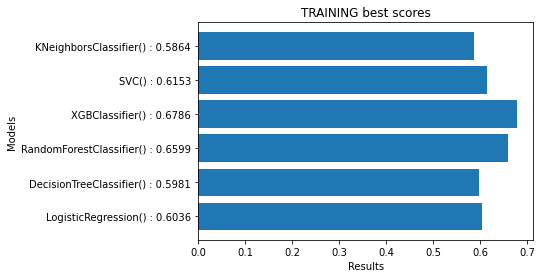

In [36]:
#training scores for all the models best parameters

fig = plt.Figure(figsize=(10, 10))
plt.barh(model_scores_train, best_score_train_list)
plt.xlabel("Results")
plt.ylabel("Models")
plt.title("TRAINING best scores")
plt.show()

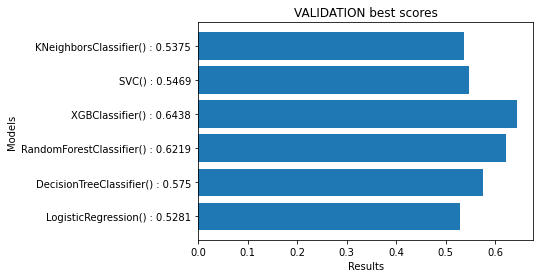

In [37]:
#validation scores for all the models best parameters

fig = plt.Figure(figsize=(10, 10))
plt.barh(model_scores_val, best_score_val_list)
plt.xlabel("Results")
plt.ylabel("Models")
plt.title("VALIDATION best scores")
plt.show()

## confusion matrix

LogisticRegression(C=10, max_iter=1000)


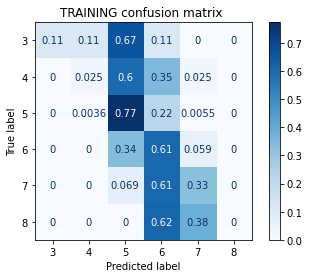

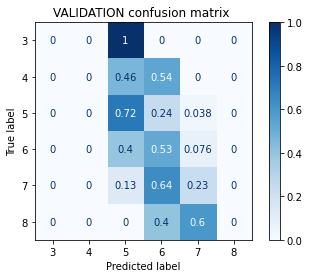



DecisionTreeClassifier(max_depth=6, min_samples_leaf=3, min_samples_split=5)


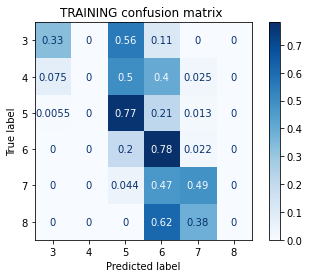

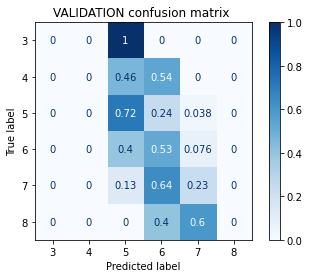



RandomForestClassifier(max_depth=7, min_samples_split=4, n_estimators=50)


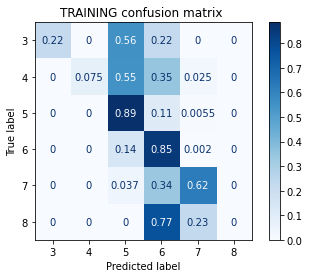

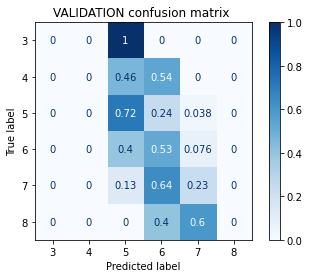



XGBClassifier(max_depth=8, min_samples_leaf=1, n_estimators=200,
              objective='multi:softprob')


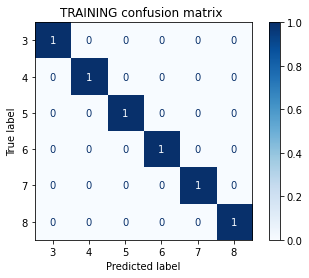

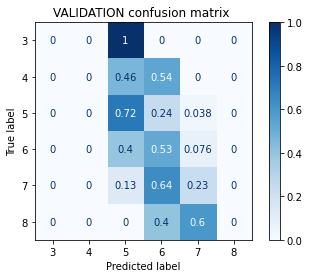



SVC(C=1)


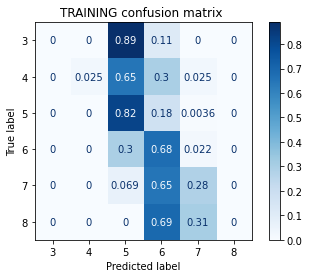

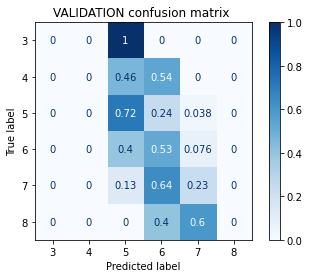



KNeighborsClassifier(metric='manhattan', n_neighbors=8)


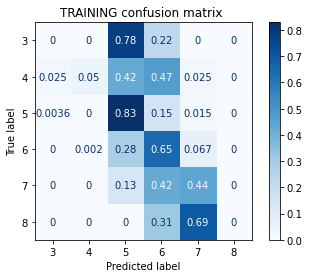

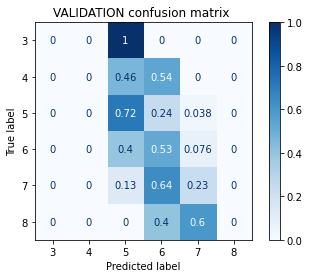

In [38]:
for i in range(len(results)):

    print(results[i]['best_estimator'])
    plot_confusion_matrix(results[i]['clf'], results[i]['x_train'], results[i]['y_train'],
                                 display_labels=list(np.unique(y)),
                                 cmap=plt.cm.Blues,
                                     normalize='true')
    plt.title(f'TRAINING confusion matrix ')
    plt.show()
    
    plot_confusion_matrix(clf, x_val, y_val,
                                 display_labels=list(np.unique(y)),
                                 cmap=plt.cm.Blues,
                                     normalize='true')
    plt.title(f'VALIDATION confusion matrix ')
    plt.show()
    print('\n')

## classification report

In [39]:
for i in range(len(results)):

    print(results[i]['best_estimator'],'\n')
    
    print('TRAINING Classification report :')
    c_r_t = classification_report(
        y_true=results[i]['y_train'],
        y_pred=results[i]['y_train_pred']
    )
    print(c_r_t)
    print('VALIDATION Classification report :')
    c_r_v = classification_report(
        y_true=results[i]['y_val'],
        y_pred=results[i]['y_val_pred']
    )
    print(c_r_v + '\n'+'\n')
    


LogisticRegression(C=10, max_iter=1000) 

TRAINING Classification report :
              precision    recall  f1-score   support

           3       1.00      0.11      0.20         9
           4       0.25      0.03      0.05        40
           5       0.67      0.77      0.72       550
           6       0.56      0.61      0.58       507
           7       0.57      0.33      0.41       160
           8       0.00      0.00      0.00        13

    accuracy                           0.61      1279
   macro avg       0.51      0.31      0.33      1279
weighted avg       0.60      0.61      0.59      1279

VALIDATION Classification report :
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        13
           5       0.61      0.66      0.63       131
           6       0.48      0.60      0.53       131
           7       0.33      0.13      0.19        39
           8       0.0

C:\Users\Kaja\anaconda3\envs\MLISA\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kaja\anaconda3\envs\MLISA\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kaja\anaconda3\envs\MLISA\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kaja\anaconda3\e